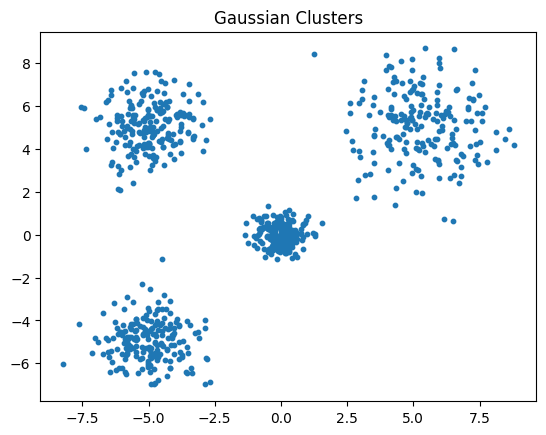

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(42)

# Means and standard deviations
means = [(-5, -5), (0, 0), (5, 5), (-5, 5)]
std_devs = [1.0, 0.5, 1.5, 1.0]

# Number of points per cluster
points_per_cluster = 200

# Generate the clusters
clusters = []
for mean, std in zip(means, std_devs):
    cluster = np.random.normal(loc=mean, scale=std, size=(points_per_cluster, 2))
    clusters.append(cluster)

# Combine the clusters to form the dataset
gaussian_data = np.vstack(clusters)

# Plot the data
plt.scatter(gaussian_data[:, 0], gaussian_data[:, 1], s=10)
plt.title('Gaussian Clusters')
plt.show()


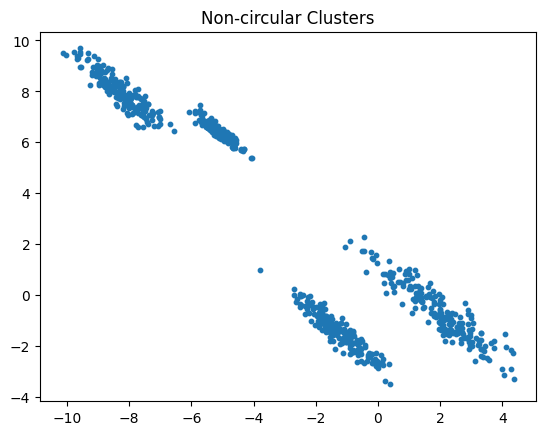

In [3]:
from sklearn.datasets import make_blobs

# Create elongated clusters
elongated_data, _ = make_blobs(n_samples=800, centers=4, cluster_std=[0.5, 1.5, 1.0, 1.0], random_state=42)

# Apply a linear transformation to make the clusters non-circular
transformation = np.array([[0.6, -0.4], [-0.4, 0.6]])
non_circular_data = elongated_data @ transformation

# Plot the data
plt.scatter(non_circular_data[:, 0], non_circular_data[:, 1], s=10)
plt.title('Non-circular Clusters')
plt.show()


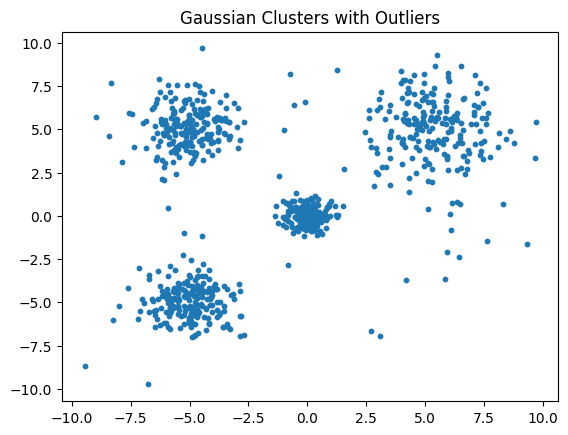

In [4]:
# Number of outliers
add_outliers = 50

# Generate outliers
outliers = np.random.uniform(low=-10, high=10, size=(add_outliers, 2))

# Combine the gaussian data with outliers
gaussian_data_with_outliers = np.vstack([gaussian_data, outliers])

# Plot the data
plt.scatter(gaussian_data_with_outliers[:, 0], gaussian_data_with_outliers[:, 1], s=10)
plt.title('Gaussian Clusters with Outliers')
plt.show()


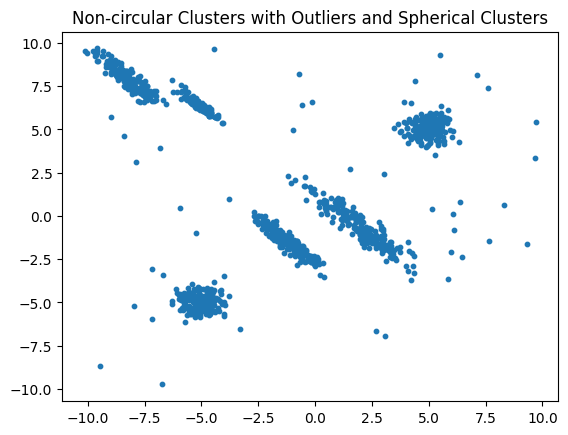

In [5]:
# Generate spherical clusters
spherical_cluster1 = np.random.normal(loc=(5, 5), scale=0.5, size=(points_per_cluster, 2))
spherical_cluster2 = np.random.normal(loc=(-5, -5), scale=0.5, size=(points_per_cluster, 2))

# Combine non-circular clusters with spherical clusters and outliers
non_circular_outlier_data = np.vstack([non_circular_data, spherical_cluster1, spherical_cluster2, outliers])

# Plot the data
plt.scatter(non_circular_outlier_data[:, 0], non_circular_outlier_data[:, 1], s=10)
plt.title('Non-circular Clusters with Outliers and Spherical Clusters')
plt.show()


In [6]:
import warnings
warnings.filterwarnings('ignore')

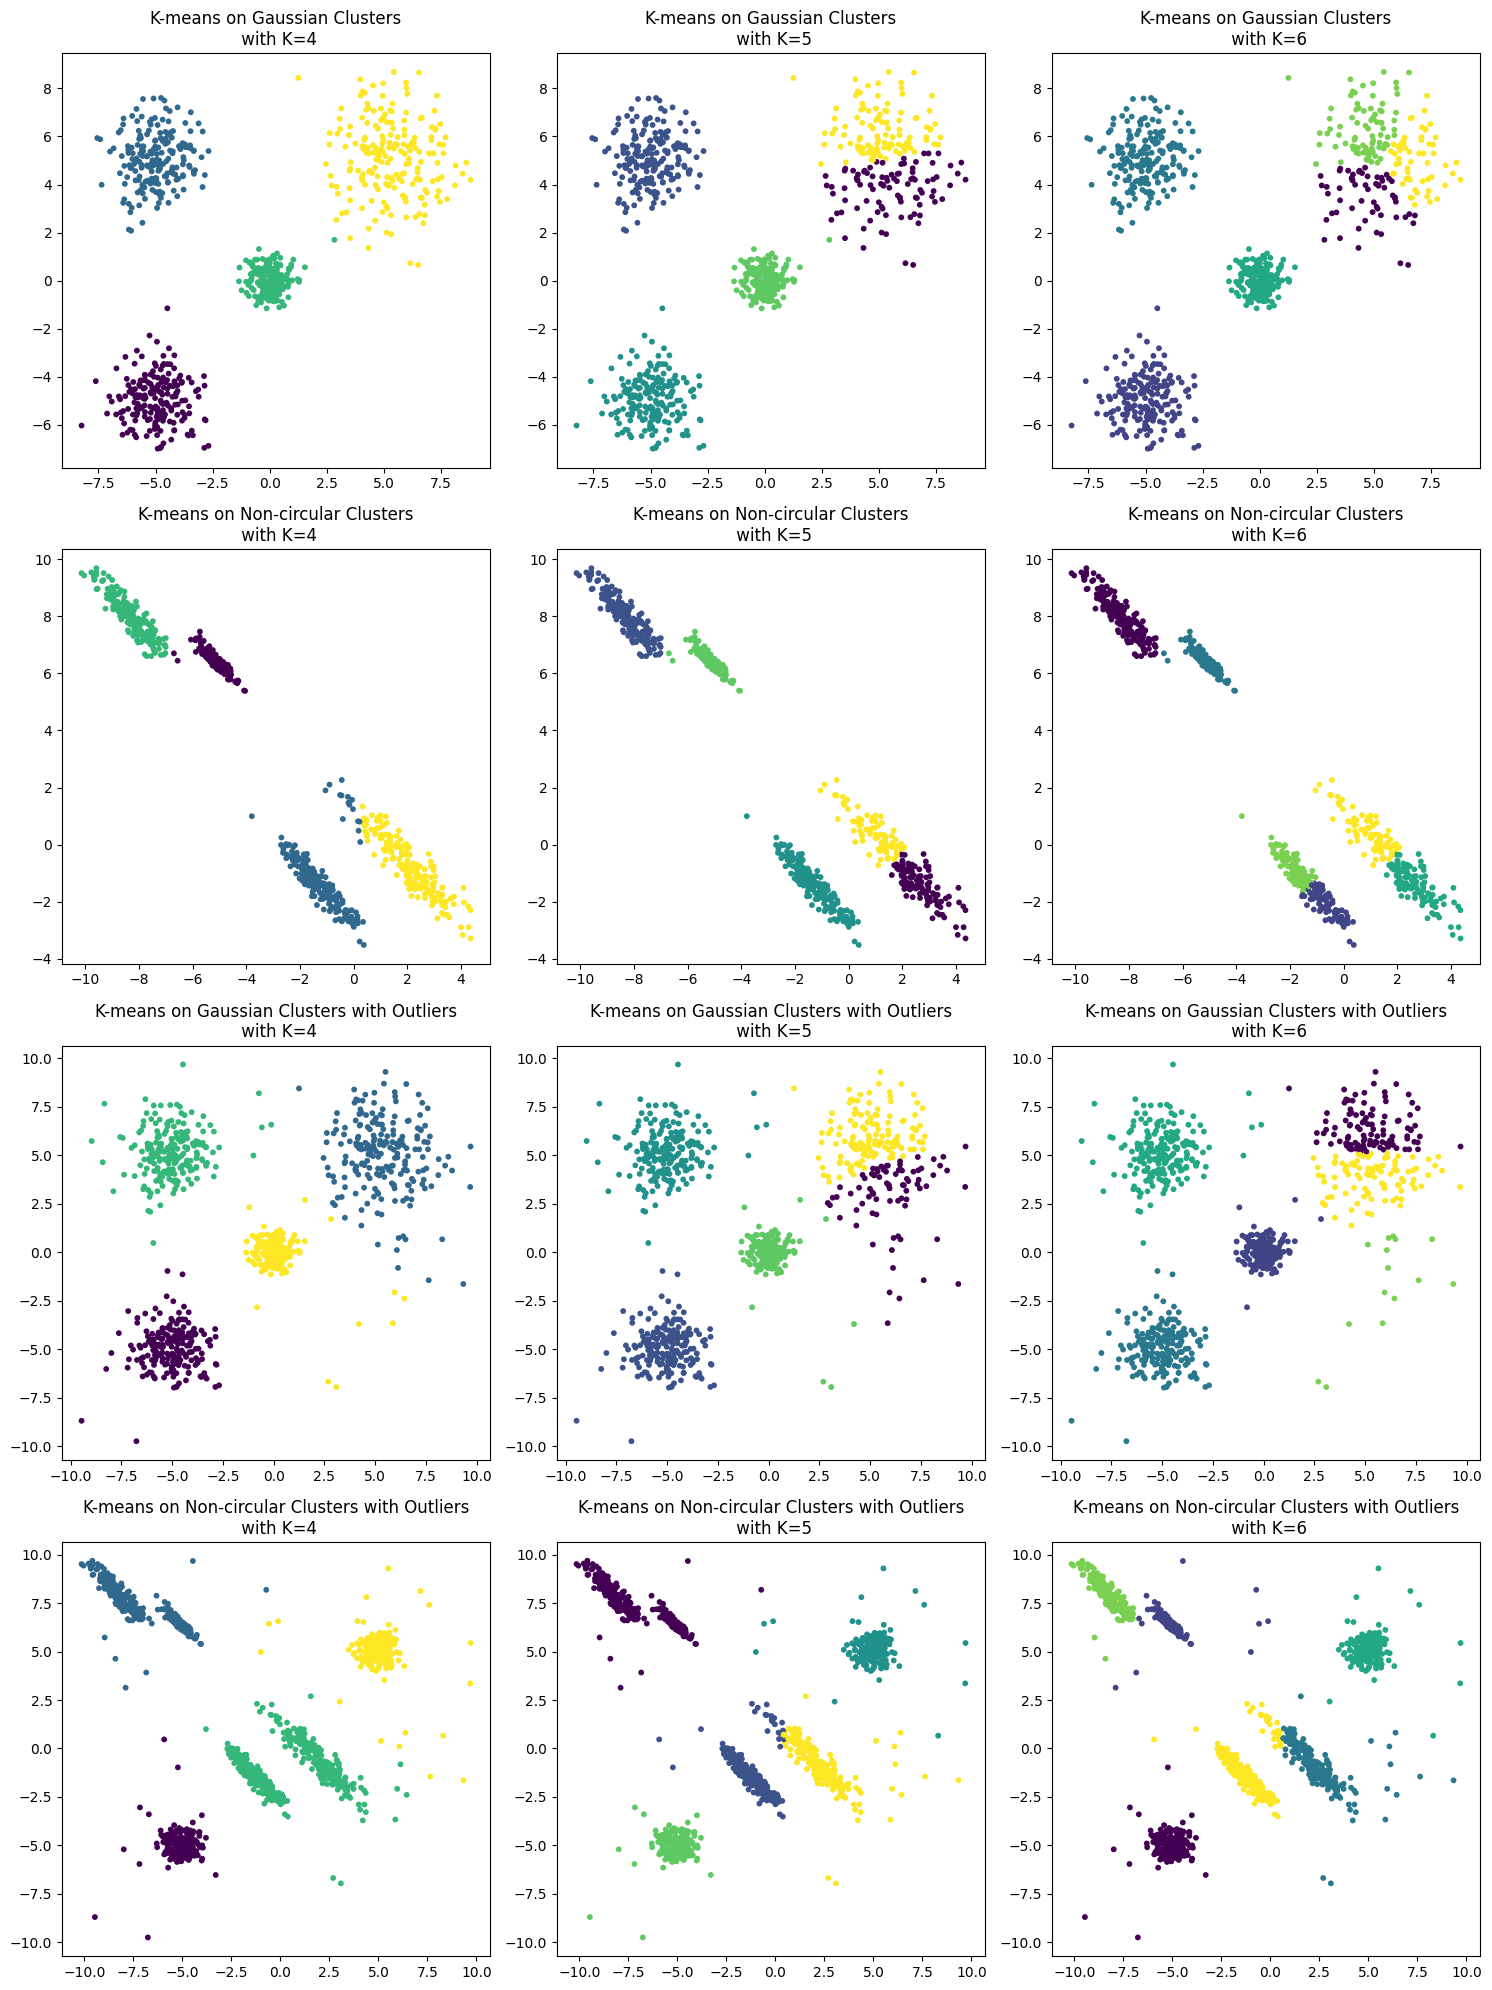

In [7]:
from sklearn.cluster import KMeans

# Function to plot K-means results
def plot_kmeans(data, n_clusters, type_of_data, ax):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    labels = kmeans.fit_predict(data)
    ax.scatter(data[:, 0], data[:, 1], c=labels, cmap='viridis', s=10)
    ax.set_title(f'K-means on {type_of_data}\n with K={n_clusters}')

# Plot K-means results for each dataset
fig, axes = plt.subplots(4, 3, figsize=(15, 20))

datasets = [gaussian_data, non_circular_data, gaussian_data_with_outliers, non_circular_outlier_data]
titles = ['Gaussian Clusters', 'Non-circular Clusters', 'Gaussian Clusters with Outliers', 'Non-circular Clusters with Outliers']

for i, data in enumerate(datasets):
    for j, k in enumerate([4, 5, 6]):
        plot_kmeans(data, k, titles[i], axes[i, j])

plt.tight_layout()
plt.show()


DBSCAN without hyperparameter tuning, using random eps and min_samples just to check the data.

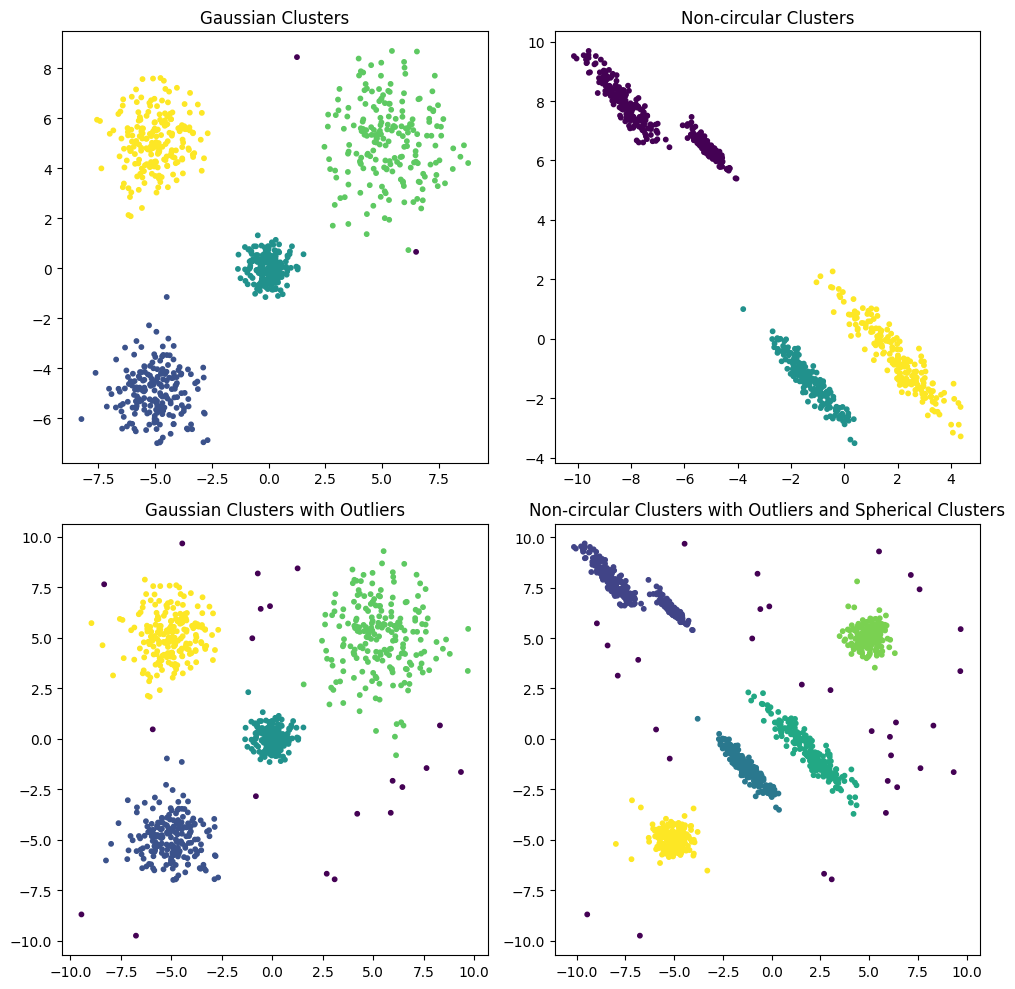

In [ ]:
# from sklearn.cluster import DBSCAN

# # Function to plot DBScan results
# def plot_dbscan(data, eps, min_samples, ax):
#     dbscan = DBSCAN(eps=eps, min_samples=min_samples)
#     labels = dbscan.fit_predict(data)
#     ax.scatter(data[:, 0], data[:, 1], c=labels, cmap='viridis', s=10)
#     ax.set_title(f'DBScan with eps={eps}, min_samples={min_samples}')

# # Plot DBScan results for each dataset
# fig, axes = plt.subplots(2, 2, figsize=(10, 10))

# dbscan_params = [(1.5, 5), (1.5, 5), (1.5, 5), (1.5, 5)]

# for i, (data, params) in enumerate(zip(datasets, dbscan_params)):
#     plot_dbscan(data, params[0], params[1], axes[i // 2, i % 2])
#     axes[i // 2, i % 2].set_title(titles[i])

# plt.tight_layout()
# plt.show()


DBSCAN with hyperparameter tuning. Used silhouette score and GridSearch for selecting best eps and min_samples value for each of the dataset.

In [8]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import DBSCAN

def dbscan_silhouette_score(data, eps, min_samples):
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    labels = dbscan.fit_predict(data)
    if len(set(labels)) > 1 and -1 in labels:  # Ensure there are more than one cluster and handle noise points
        score = silhouette_score(data, labels)
    else:
        score = -1  # Invalid score if only one cluster or all points are noise
    return score

def grid_search_dbscan(data, eps_values, min_samples_values):
    best_score = -1
    best_params = {"eps": None, "min_samples": None}
    for eps in eps_values:
        for min_samples in min_samples_values:
            score = dbscan_silhouette_score(data, eps, min_samples)
            if score > best_score:
                best_score = score
                best_params["eps"] = eps
                best_params["min_samples"] = min_samples
    return best_params, best_score

# Define parameter grid
eps_values = np.arange(0.1, 1.5, 0.1)
min_samples_values = np.arange(2, 10, 1)


In [9]:
# Function to perform grid search and return the best params for each dataset
def get_best_dbscan_params(datasets, eps_values, min_samples_values):
    best_params_dict = {}
    for i, data in enumerate(datasets):
        best_params, best_score = grid_search_dbscan(data, eps_values, min_samples_values)
        best_params_dict[i] = best_params
        print(f"Dataset {i+1}: Best parameters: {best_params}, Best Silhouette Score: {best_score}")
    return best_params_dict

# Get best DBScan params for each dataset
best_dbscan_params = get_best_dbscan_params(datasets, eps_values, min_samples_values)


Dataset 1: Best parameters: {'eps': 1.0, 'min_samples': 3}, Best Silhouette Score: 0.7463055364387842
Dataset 2: Best parameters: {'eps': 0.5, 'min_samples': 9}, Best Silhouette Score: 0.6602296751450442
Dataset 3: Best parameters: {'eps': 1.4000000000000001, 'min_samples': 8}, Best Silhouette Score: 0.7067067435099087
Dataset 4: Best parameters: {'eps': 1.4000000000000001, 'min_samples': 5}, Best Silhouette Score: 0.7036483783787845


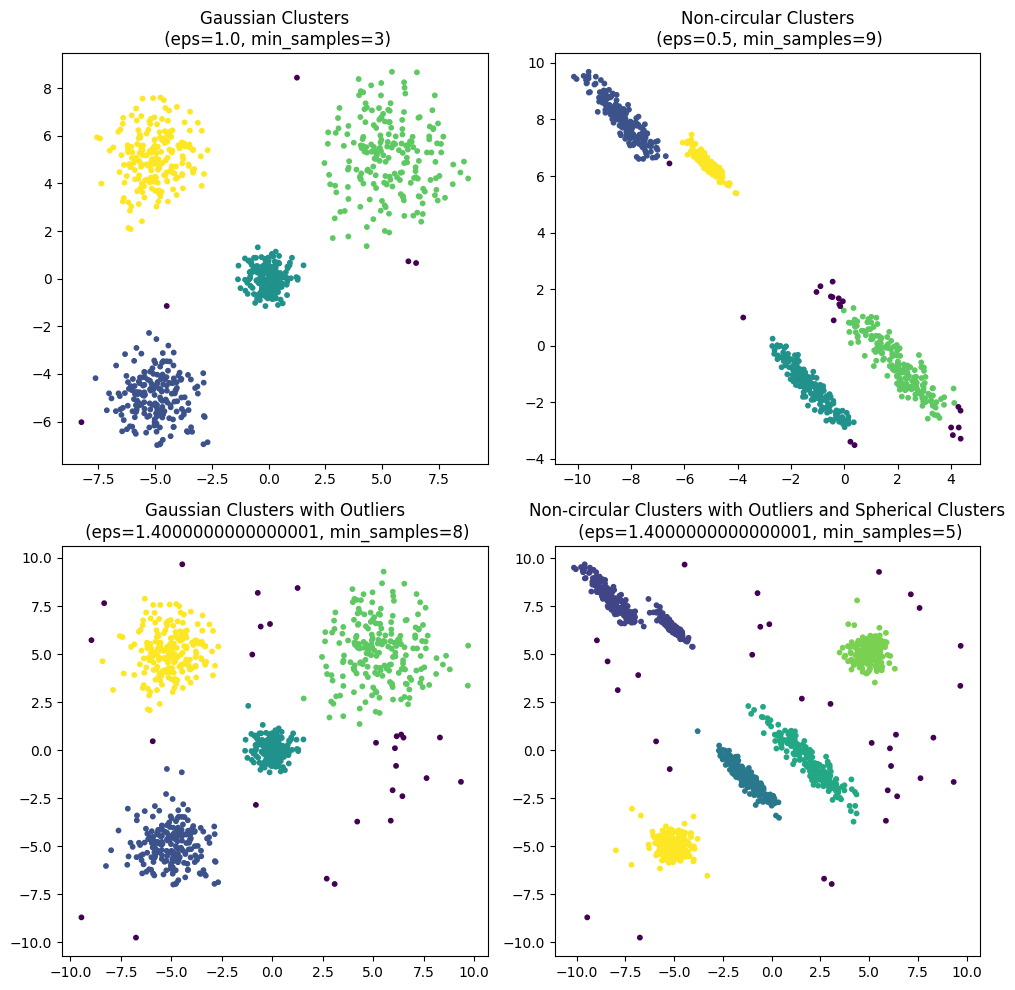

In [10]:
# Plot DBScan results using the best parameters
fig, axes = plt.subplots(2, 2, figsize=(10, 10))

titles = ['Gaussian Clusters', 'Non-circular Clusters', 'Gaussian Clusters with Outliers', 'Non-circular Clusters with Outliers and Spherical Clusters']

for i, (data, title) in enumerate(zip(datasets, titles)):
    params = best_dbscan_params[i]
    dbscan = DBSCAN(eps=params["eps"], min_samples=params["min_samples"])
    labels = dbscan.fit_predict(data)
    ax = axes[i // 2, i % 2]
    ax.scatter(data[:, 0], data[:, 1], c=labels, cmap='viridis', s=10)
    ax.set_title(f'{title}\n (eps={params["eps"]}, min_samples={params["min_samples"]})')

plt.tight_layout()
plt.show()
